In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib as mp
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import linear_model

## 1.2 Information sur les données

In [2]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


On traite un problème de régression

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#spécificité total_bedrooms
df['total_bedrooms'].isna().sum()

207

total_bedrooms a 207 lignes nulles

In [6]:
#affichage occurences et leurs valeurs
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000145F6A243A0>,
      dtype=object)

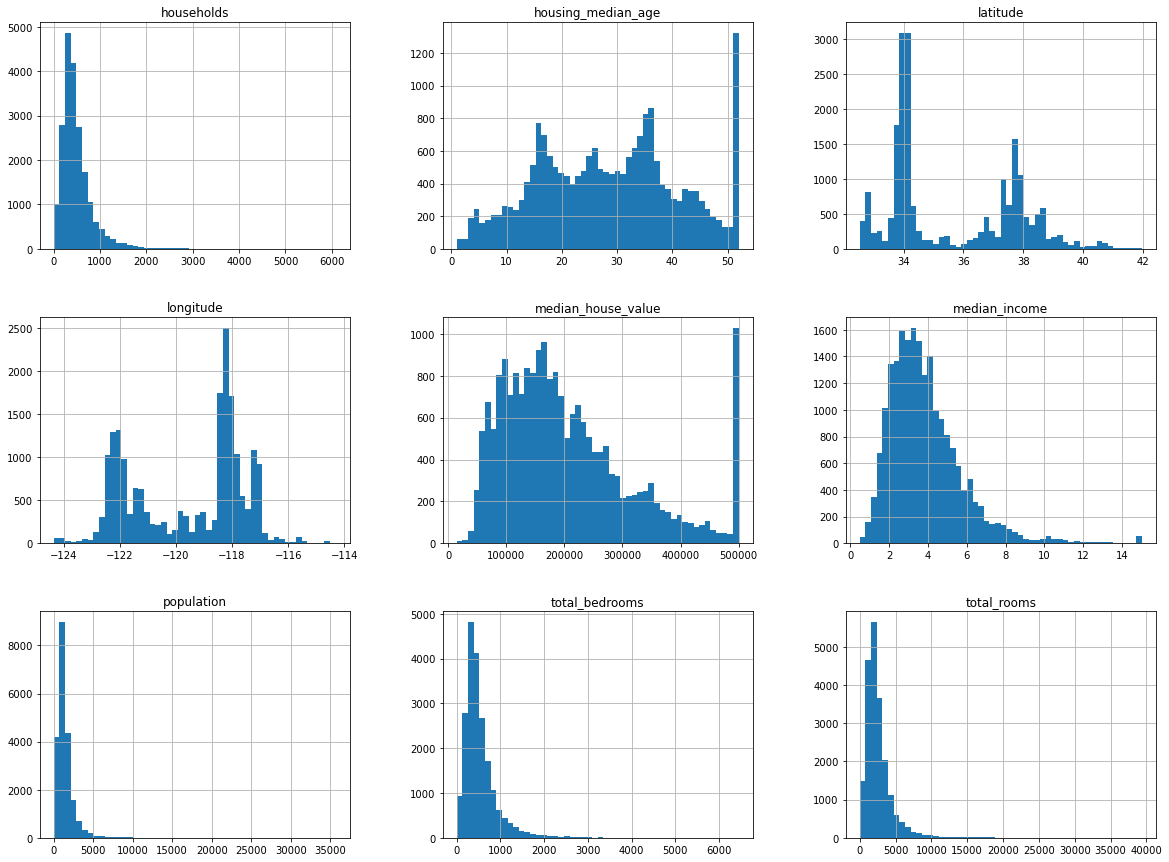

In [8]:
df.hist(bins=50, figsize=(20,15))


## 1.3 Répartition des données

In [9]:
X=df.loc[:,df.columns!='median_house_value']
Y=df.loc[:,'median_house_value']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,NEAR OCEAN
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,<1H OCEAN
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,INLAND
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,INLAND
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,NEAR BAY


## 1.4 Découverte et visualisation des données

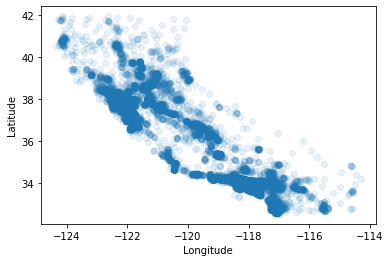

In [12]:
plt.scatter(X_train['longitude'], X_train['latitude'], alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [13]:
pict=plt.imread('California.png')

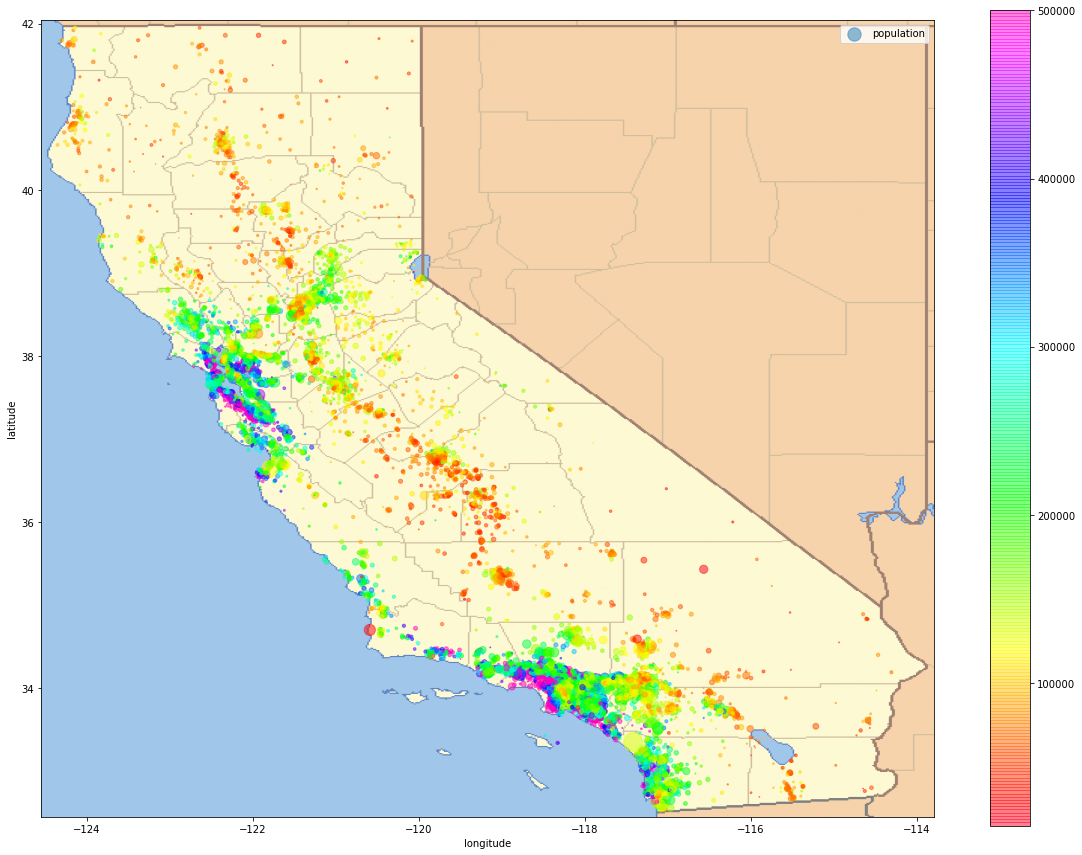

In [14]:
fig, ax = plt.subplots(figsize = (20,15))

ax.imshow(pict,zorder=0,extent=[-124.55, -113.80, 32.45, 42.05])

X_train.plot(ax=ax, kind='scatter', x='longitude', y='latitude', alpha=0.5,
         s=X_train['population']/100,
         label='population',
         c=Y_train,
         cmap=plt.get_cmap('gist_rainbow'),
         colorbar=True,
         sharex=False,
         figsize=(20,15),
         zorder=1)

plt.legend()

In [15]:
#sns.heatmap(X_train.corr(),annot=True, cmap='viridis')
X_train.corrwith(Y_train)

longitude            -0.047277
latitude             -0.142702
housing_median_age    0.106470
total_rooms           0.133016
total_bedrooms        0.045394
population           -0.027053
households            0.062294
median_income         0.692758
dtype: float64

## 1.5 Nettoyage des données

In [16]:
df_input = df.drop("median_house_value", axis=1)
df_labels = df['median_house_value'].copy()

In [17]:
df = df.fillna(df['total_bedrooms'].median())


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
#df_num = df_input.drop('ocean_proximity', axis=1)
#df_num.head(10)

In [20]:
encoder = LabelEncoder()
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])

In [21]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,3
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,3
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,3
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


## 2 Sélection, apprentissage et évaluation du modèle

In [23]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,-0.014631
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014631,-0.070282,-0.018186,-0.014957,0.081750,1.000000


In [24]:
X=df.loc[:,df.columns!='median_house_value']
Y=df.loc[:,'median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [25]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)


In [26]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [27]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([176148.0316882 , 279754.02728305, 215162.34948468, ...,
       261938.68245475, 310760.86633266,  34820.71653273])

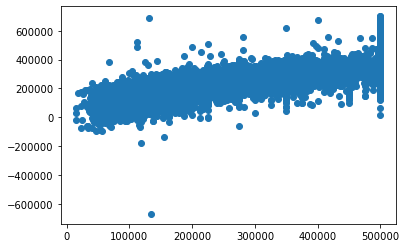

In [28]:
#plt.scatter(X_train.loc['median_income'], y_train)
plt.scatter(y_train, y_pred_train)

In [29]:
rmse = mean_squared_error(y_train, y_pred_train, squared=False)
rmse

69618.59441427024

In [30]:
regressor.score(X_train, y_train)

0.6378622313185247

#### DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [32]:
#construction de l'arbre
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred_clf = clf.predict(X_train)


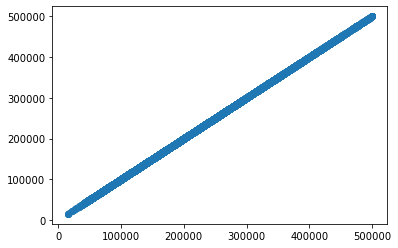

In [34]:
#plt.scatter(X_train, Y_train)
plt.scatter(y_train, y_pred_clf)

In [35]:
rmse = mean_squared_error(y_train, y_pred_clf, squared=False)
rmse

0.0

#### 5)

In [36]:
from sklearn.model_selection import cross_val_score

#regressor

scores = cross_val_score(clf, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
print(-scores)
rmse_scores = np.sqrt(-scores)


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[6.53267344e+09 5.67829520e+09 6.67253607e+09 6.00814379e+09
 5.65029051e+09 6.51408748e+09 6.35498643e+09 6.50339387e+09
 6.80711150e+09 5.91174267e+09]


In [37]:
print("Moyenne:\t ", rmse_scores.mean(), "\nEcart Type:\t", rmse_scores.std())

Moyenne:	  79101.04106561594 
Ecart Type:	 2520.1981914248786


#### 6)

In [38]:
score = cross_val_score(regressor, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
print(-score)
rmse_score = np.sqrt(-score)

[5.21809264e+09 4.50193554e+09 5.02642421e+09 4.64033316e+09
 5.45601214e+09 4.82815415e+09 4.61133166e+09 4.64706461e+09
 5.40062126e+09 4.42987246e+09]


In [39]:
print("Moyenne:\t ", rmse_score.mean(), "\nEcart Type:\t", rmse_score.std())

Moyenne:	  69782.22196641106 
Ecart Type:	 2534.893061545426


In [40]:
print("Arbre de décision :\n Moyenne:\t ", rmse_scores.mean(), "\n Ecart Type:\t", rmse_scores.std(),  
      "\n\nRégression linéraire :\n Moyenne:\t ", rmse_score.mean(), "\n Ecart Type:\t", rmse_score.std())

Arbre de décision :
 Moyenne:	  79101.04106561594 
 Ecart Type:	 2520.1981914248786 

Régression linéraire :
 Moyenne:	  69782.22196641106 
 Ecart Type:	 2534.893061545426


Le modèle d'arbre de décision est moins performant que celui de régression linéraire

## 3 Fine-Tunning

## 3.1 Grid Search

In [41]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [42]:
param_grid = {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}

In [43]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(forest_reg, param_grid, scoring='neg_mean_squared_error')


In [44]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             scoring='neg_mean_squared_error')

In [45]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [46]:
cvres = grid_search.cv_results_

In [47]:
print("{}\t\t {}\n".format('R² moyen','Paramètres'))

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    x = np.sqrt(-mean_score)
    y = params
    print("{:.2f}\t {}".format(x, y))

R² moyen		 Paramètres

62509.16	 {'max_features': 2, 'n_estimators': 3}
54660.27	 {'max_features': 2, 'n_estimators': 10}
51794.54	 {'max_features': 2, 'n_estimators': 30}
59200.06	 {'max_features': 4, 'n_estimators': 3}
52276.30	 {'max_features': 4, 'n_estimators': 10}
49891.59	 {'max_features': 4, 'n_estimators': 30}
59010.08	 {'max_features': 6, 'n_estimators': 3}
51732.19	 {'max_features': 6, 'n_estimators': 10}
50407.26	 {'max_features': 6, 'n_estimators': 30}
58473.67	 {'max_features': 8, 'n_estimators': 3}
52863.57	 {'max_features': 8, 'n_estimators': 10}
50913.45	 {'max_features': 8, 'n_estimators': 30}


## 3.2 Evaluation sur la base de test

In [48]:
final_model = grid_search.best_estimator_

In [51]:
sc_X = StandardScaler()
X_test_prepared = sc_X.fit_transform(X_test)

In [52]:
final_predictions = final_model.predict(X_test_prepared)

In [53]:
# calcul rmse en 2 temps
#final_mse = mean_squared_error(y_test, final_predictions)
#final_rmse = np.sqrt(final_mse)

In [54]:
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)


In [55]:
final_rmse

54751.90884673883